<a href="https://colab.research.google.com/github/marcus2348532/ML_LAB/blob/main/2348532_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df=df.drop(columns='Surname',axis=1)  #df=df.drop(['Surname', 'RowNumber', 'CustomerId'])

In [6]:
df=df.drop(columns='RowNumber',axis=1)

In [7]:
df=df.drop(columns='CustomerId',axis=1)

In [8]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

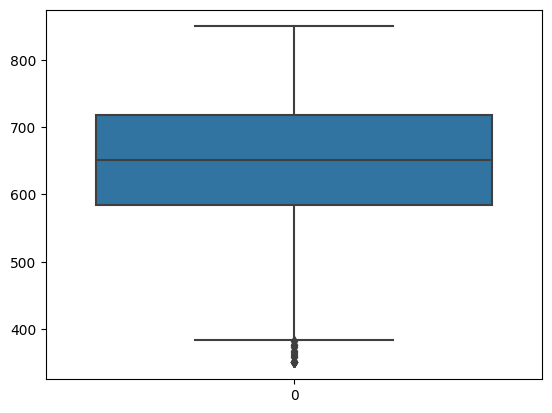

In [9]:
sns.boxplot(df['CreditScore'])

In [10]:
outliers=np.where(df['CreditScore']<=400)[0]
outliers

array([   7,  942, 1193, 1201, 1405, 1631, 1838, 1962, 2473, 2579, 5285,
       5494, 6253, 8154, 8723, 8762, 9210, 9356, 9624])

In [11]:
df.drop(index=outliers, inplace=True)

<Axes: >

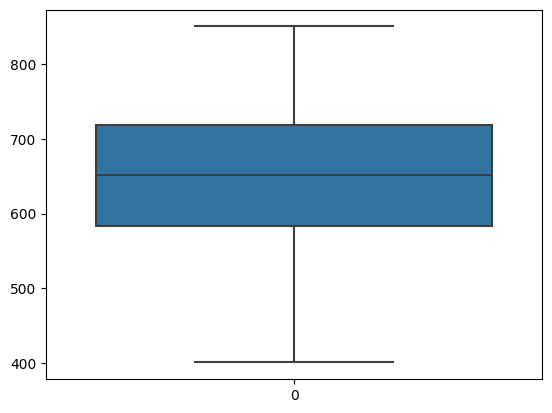

In [12]:
sns.boxplot(df['CreditScore'])

In [13]:
numeric_data=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

In [14]:
numeric_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000,9981.000000
mean,651.067528,38.912634,5.014628,76455.866471,1.530408,100037.449178
std,95.950021,10.487887,2.891489,62401.960813,0.580928,57521.103642
min,401.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,50908.480000
50%,652.000000,37.000000,5.000000,97133.920000,1.000000,100127.710000
75%,718.000000,44.000000,8.000000,127631.620000,2.000000,149381.320000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [15]:
numeric_data.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.001337,-0.001017,0.007763,0.011346,0.001413
Age,-0.001337,1.000000,-0.010022,0.028293,-0.029561,-0.008027
Tenure,-0.001017,-0.010022,1.000000,-0.011677,0.012918,0.008250
Balance,0.007763,0.028293,-0.011677,1.000000,-0.305846,0.012566
NumOfProducts,0.011346,-0.029561,0.012918,-0.305846,1.000000,0.014586
EstimatedSalary,0.001413,-0.008027,0.008250,0.012566,0.014586,1.000000


In [16]:
categorical_data=df[['Gender','Geography', 'HasCrCard','IsActiveMember','Exited']]

In [17]:
categorical_data.head()

,Gender,Geography,HasCrCard,IsActiveMember,Exited
0,Female,France,1,1,1
1,Female,Spain,0,1,0
2,Female,France,1,0,1
3,Female,France,0,0,0
4,Female,Spain,1,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_data.columns:
  le=LabelEncoder()
  categorical_data[col]=le.fit_transform(categorical_data[col])


<ipython-input-18-b52372a5e722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col]=le.fit_transform(categorical_data[col])
<ipython-input-18-b52372a5e722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col]=le.fit_transform(categorical_data[col])
<ipython-input-18-b52372a5e722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [19]:
 categorical_data.head()

,Gender,Geography,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,0,2,0,1,0
2,0,0,1,0,1
3,0,0,0,0,0
4,0,2,1,1,0


In [20]:
from sklearn.feature_selection import chi2
X=categorical_data.drop(columns=['Exited'])
Y=categorical_data['Exited']

In [21]:
chi_scores=chi2(X,Y)
chi_scores

(array([ 50.98953131,  11.04282285,   0.20279286, 116.72088037]),
 array([9.28598984e-13, 8.90311952e-04, 6.52475914e-01, 3.30448948e-27]))

<Axes: >

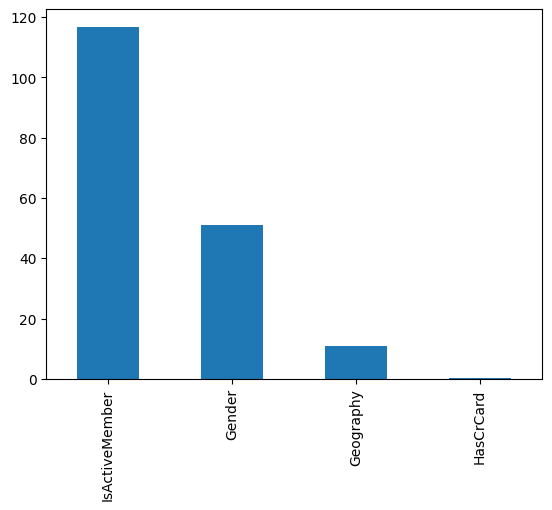

In [22]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

In [23]:
from scipy.stats import chi2_contingency
chi2 , p_value , dof , expected = chi2_contingency(chi_scores)

In [24]:
alpha = 0.05
if p_value <= alpha:
  print('null hypothesis is rejected ; there is a significant relationship between isActiveMember,Gender and Exited')
else:
  print('null hypothesis is accepted ; there is no significant relationship between isActiveMember,Gender and Exited')

null hypothesis is rejected ; there is a significant relationship between isActiveMember,Gender and Exited


In [25]:
new_data = pd.concat([numeric_data , categorical_data],axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

In [27]:
scaled_data

array([[-0.33422749,  0.2943892 , -1.04263892, ...,  0.64649601,
         0.9695059 ,  1.98645063],
       [-0.44887626,  0.19903633, -1.38849884, ..., -1.54679995,
         0.9695059 , -0.50341045],
       [-1.55367342,  0.2943892 ,  1.03252058, ...,  0.64649601,
        -1.03145324,  1.98645063],
       ...,
       [ 0.60380783, -0.277728  ,  0.68666067, ..., -1.54679995,
         0.9695059 ,  1.98645063],
       [ 1.26043256,  0.2943892 , -0.696779  , ...,  0.64649601,
        -1.03145324,  1.98645063],
       [ 1.46888486, -1.04055095, -0.35091908, ...,  0.64649601,
        -1.03145324, -0.50341045]])

In [28]:
from sklearn.decomposition import PCA
numeric_scaled = scaler.fit_transform(scaled_data)
n_components = 2
pca = PCA(n_components=n_components)

In [29]:
numeric_pca = pca.fit_transform(scaled_data)

In [30]:
print("explained variance ratio:",pca.explained_variance_ratio_)

explained variance ratio: [0.13060301 0.11102032]


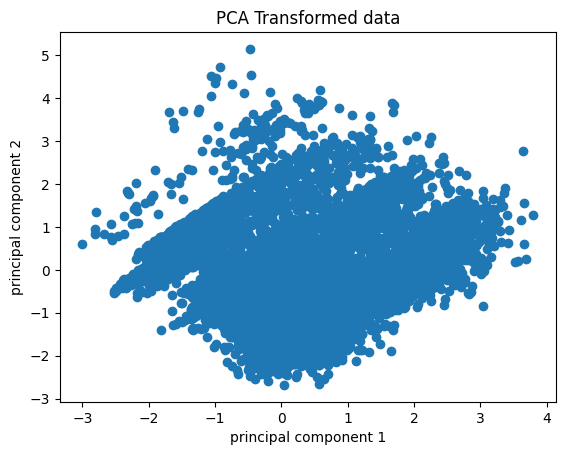

In [31]:
plt.scatter(numeric_pca[:,0],numeric_pca[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('PCA Transformed data')
plt.show()

In [32]:
bin_edges = [18,30,40,50,60,70,100]
bin_labels = ['18-29' , '30-39','40-49','50-59','60-69','70+']
new_data['age group']=pd.cut(new_data['Age'],bins=bin_edges,labels=bin_labels , right=False)

In [33]:
score_edges = [401,500,600,700,800,900]
score_labels = ['401-499' ,'500-599','600-699','700-799','800-850']
new_data['CreditScore Group'] = pd.cut(new_data['CreditScore'],bins=score_edges , labels=score_labels , right=False)

In [34]:
new_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Gender,Geography,HasCrCard,IsActiveMember,Exited,age group,CreditScore Group
0,619,42,2,0.00,1,101348.88,0,0,1,1,1,40-49,600-699
1,608,41,1,83807.86,1,112542.58,0,2,0,1,0,40-49,600-699
2,502,42,8,159660.80,3,113931.57,0,0,1,0,1,40-49,500-599
3,699,39,1,0.00,2,93826.63,0,0,0,0,0,30-39,600-699
4,850,43,2,125510.82,1,79084.10,0,2,1,1,0,40-49,800-850
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,1,0,1,0,0,30-39,700-799
9996,516,35,10,57369.61,1,101699.77,1,0,1,1,0,30-39,500-599
9997,709,36,7,0.00,1,42085.58,0,0,0,1,1,30-39,700-799
9998,772,42,3,75075.31,2,92888.52,1,1,1,0,1,40-49,700-799


In [35]:
correlation_matrix = new_data.corr()

<ipython-input-35-f3d811367f7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = new_data.corr()


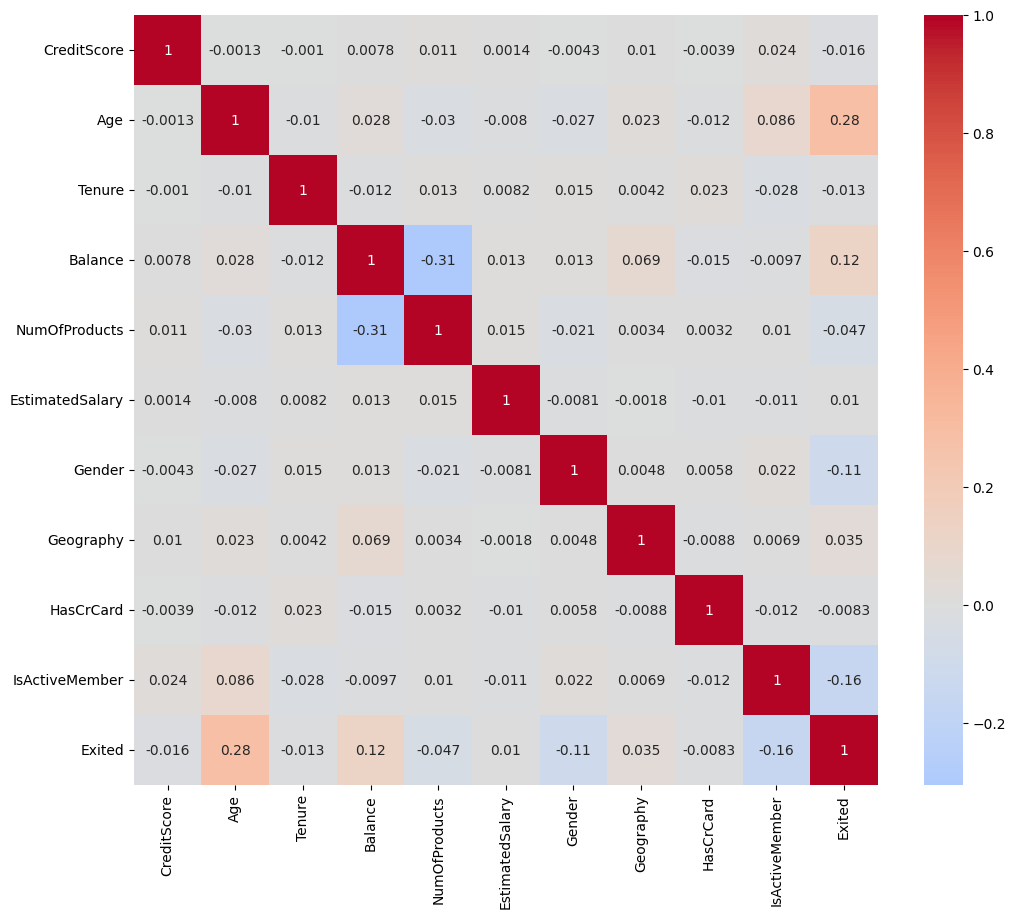

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix , annot=True , cmap ='coolwarm' , center=0)
plt.show()